# Task Analysis:
    
KPIs:
1. Summary Metrics of Tasks.
2. Client Analysis.
3. Task Category Types Analysis.
4. Percentage completed across categories.
5. Time Seriese Analysis on dates.
6. Linear Regression on Task to determine actual predictors of task completion.


In [16]:
# Let's go ahead and start with some imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import datetime

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Data Preparation:

In [2]:
# Reading Data
task_df = pd.read_csv("Tasks_DF.csv", encoding='latin1',low_memory=False)

In [93]:
#Some basic info related to data:
task_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96333 entries, 0 to 96332
Data columns (total 27 columns):
TaskNumber            96331 non-null float64
DateCreated           96332 non-null object
TimeCreated           96332 non-null object
RequestedBy           96321 non-null object
DeveloperKey          96331 non-null float64
Client                96331 non-null float64
PriorityIndex         96331 non-null float64
Archive               96331 non-null float64
Schedule              96331 non-null float64
ActualTimeTaken       96331 non-null float64
ArchiveDate           60747 non-null object
Category              96333 non-null int64
Category2             96331 non-null float64
Category3             96331 non-null float64
Category4             96331 non-null float64
Category5             96331 non-null float64
Validated             96331 non-null float64
Show                  96331 non-null float64
UpdatedBy             96331 non-null object
UpdatedOnDate         96331 non-null object

# 1. Summary Metrics

In [7]:
#Request raised by Different Users:
counts = DataFrame(task_df['RequestedBy'].value_counts())
counts



,RequestedBy
MansiAnand@apjllcom,1488
TammieSmith@amjllcom,833
ArethaMcDonald@apjllcom,764
ArethaMcDonald,757
BrianRosatone,711
MatthewWestwood@amjllcom,667
Mark Hayes,641
Parker,640
PaulMelchizedec@apjllcom,575
jllservicedesk@ibmserviceengagecom,499


Mansi anand has raised most number of requests ~1488

In [8]:
#Column wise summary:
task_df.describe()

,TaskNumber,DeveloperKey,Client,PriorityIndex,Archive,Schedule,ActualTimeTaken,Category1,Category2,Category3,Category4,Category5,Validated,Show,ClientID,GlobalChangeYsNo,ReopenedTicket,RepeatTicket,IsTaskComplete
count,96331.000000,96331.000000,96331.000000,96331.000000,96331.000000,96331.000000,96331.000000,96331.000000,96331.000000,96331.000000,96331.000000,96331.000000,96331.000000,96331.000000,96331.000000,96331.000000,57143.000000,57144.000000,96333.000000
mean,48279.289076,77.172021,217.685844,2.851034,0.968847,0.437284,0.124153,9.793960,5.260903,167.937881,-0.171077,1732.289346,0.044098,0.994778,14.664054,0.000104,0.000490,0.000157,0.949675
std,27871.918951,44.913990,148.569123,2.748604,0.173732,0.496054,3.339923,13.602433,1.657255,241.963585,2.037902,3005.664688,0.205314,0.072072,71.849340,0.010188,0.022131,0.012549,0.218617
min,1.000000,-1.000000,-3.000000,1.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000
25%,24145.500000,35.000000,68.000000,1.000000,1.000000,0.000000,0.000000,2.000000,5.000000,5.000000,-2.000000,-2.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000
50%,48251.000000,75.000000,204.000000,2.000000,1.000000,0.000000,0.000000,2.000000,5.000000,5.000000,1.000000,-2.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000
75%,72433.500000,117.000000,341.000000,3.000000,1.000000,1.000000,0.000000,11.000000,5.000000,522.000000,1.000000,2638.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000
max,96558.000000,194.000000,563.000000,8.000000,1.000000,1.000000,862.974000,68.000000,22.000000,527.000000,8.000000,12776.000000,1.000000,1.000000,561.000000,1.000000,1.000000,1.000000,1.000000


Tasks Completed with 0.949675 accuracy with a Standard Deviation of 0.218617

In [9]:
#Average request counts per user:
np.mean(task_df['RequestedBy'].value_counts())


11.470882458020721

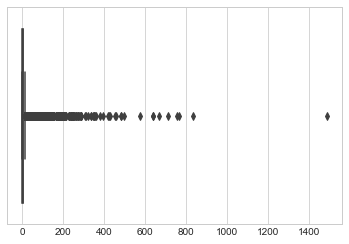

In [10]:
sns.boxplot(counts)

This signifies that most of the tasks were requested by upper 10 % of the requesters.

# Some plots on Tasks:

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


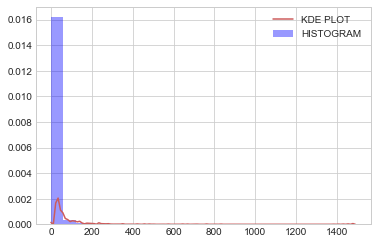

In [11]:
sns.distplot(counts,bins=25,
             kde_kws={'color':'indianred','label':'KDE PLOT'},
             hist_kws={'color':'blue','label':"HISTOGRAM"})

In [100]:
Devp_counts = DataFrame(task_df['DeveloperKey'].value_counts())

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


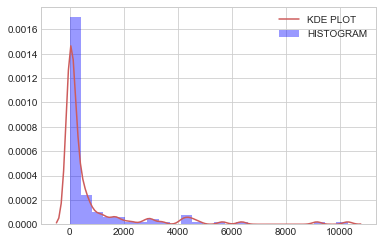

In [101]:
sns.distplot(Devp_counts,bins=25,
             kde_kws={'color':'indianred','label':'KDE PLOT'},
             hist_kws={'color':'blue','label':"HISTOGRAM"})

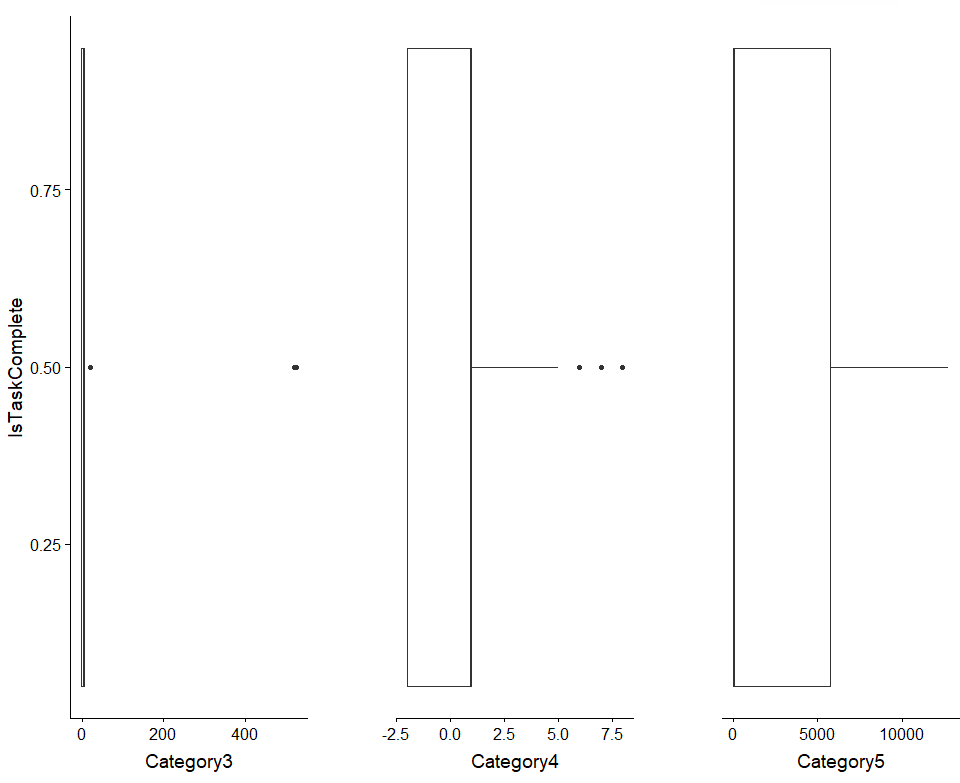

In [151]:
from IPython.display import Image
Image(filename='boxp_2.png')

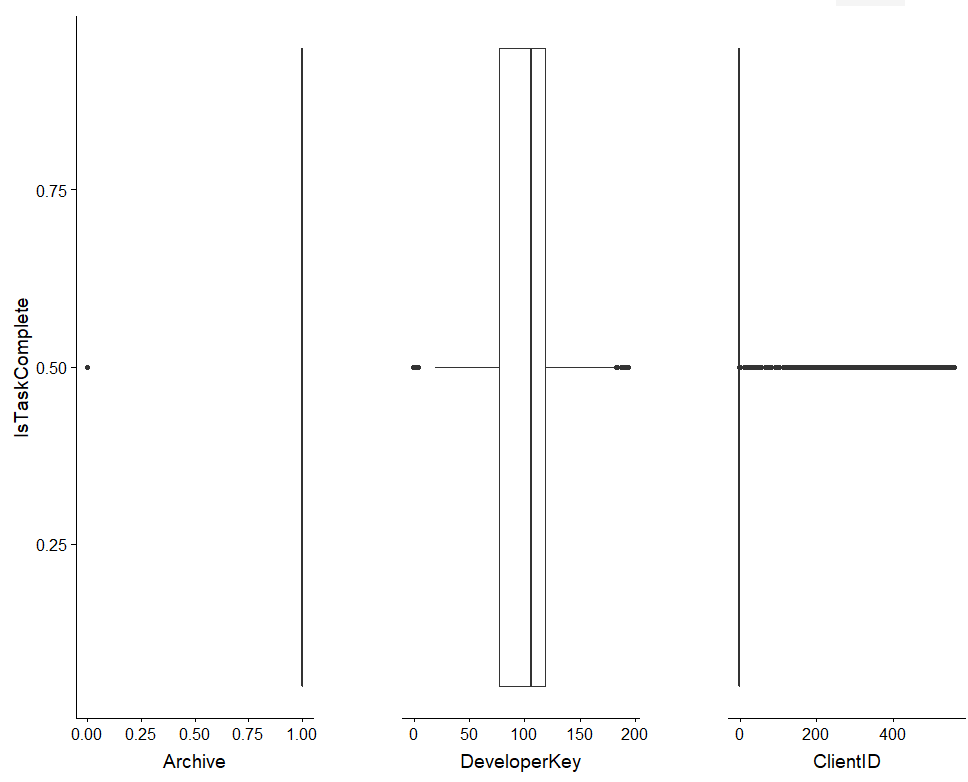

In [152]:
from IPython.display import Image
Image(filename='boxp_1.png')

In [ ]:
# Missing Data Analysis:
# Gridview of missing values in DataFrame
task_df.isnull()

In [11]:
task_df['ProjectCode'].isnull().value_counts()

False    96333
Name: ProjectCode, dtype: int64

96333 values are not available.

In [81]:
tsk_updated = pd.read_csv("Tasks_DF.csv", encoding='latin1',low_memory=False)

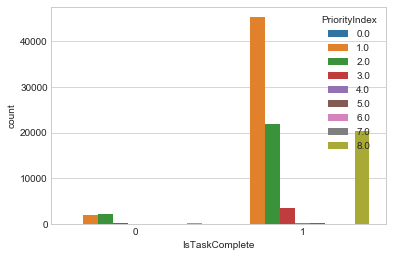

In [12]:
sns.countplot('IsTaskComplete',data=task_df,hue='PriorityIndex')


In [11]:
for col in task_df.columns: 
    print(col)


TaskNumber
DateCreated
TimeCreated
RequestedBy
UserName
LoginName
Email
ContactNo
DeveloperKey
Client
TaskName
PriorityIndex
Archive
Schedule
ScheduleDate
ClientDBChange
TaskLoadedKey
ActualTimeTaken
ArchiveDate
ArchiveTime
RequestedDeliveryDate
Category1
Category2
Category3
Category4
Category5
StartDate
PercentComplete
Validated
Show
UpdatedBy
UpdatedOnDate
UpdatedOnTime
ClientID
CreatedOnDate
CreatedOnTime
UserCount
UserKey
ApprovalStatus
ApproverID
ClientApproverName
CompanyOfUser
UserTypeKey
GlobalChangeYsNo
ReopenedTicket
RepeatTicket
StartTime
EndTime
CostIncurYsNo
HrsBilled
EmailReceivedDate
EmailReceivedTime
ActualTaskCompDate
TaskStartTime
TaskEndTime
ProjectCode
IsTaskComplete


In [223]:
task_df['ProjectCode'].fillna('Missing',inplace=True)

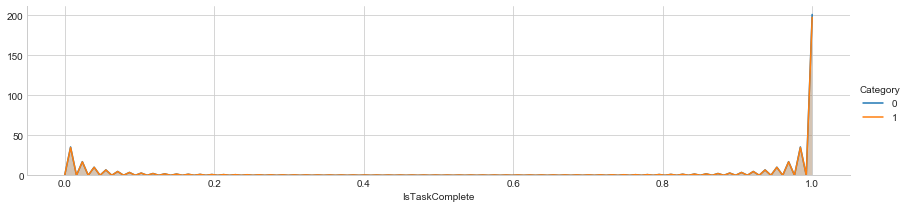

In [102]:
# Let's do the same for class by changing the hue argument:
fig = sns.FacetGrid(task_df, hue="Category",aspect=4)
fig.map(sns.kdeplot,'IsTaskComplete',shade= True)

fig.add_legend()

In [37]:
#for coulumn "ActualTaskCompDate":
task_df['ActualTaskCompDate'].isnull().value_counts()


False    96333
Name: ActualTaskCompDate, dtype: int64

In [ ]:
task_df.info()

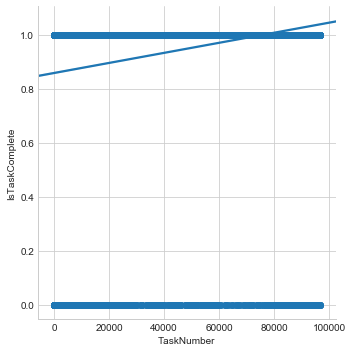

In [38]:
sns.lmplot('TaskNumber','IsTaskComplete',data=task_df)

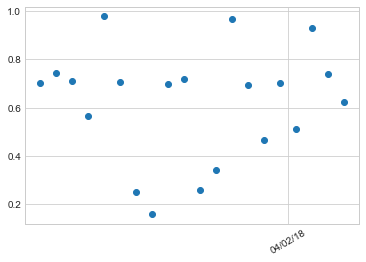

In [103]:
import matplotlib.pyplot as plt
from matplotlib.dates import (YEARLY, DateFormatter,
                              rrulewrapper, RRuleLocator, drange)
import numpy as np
import datetime

# Fixing random state for reproducibility
np.random.seed(19680801)


# tick every 5th easter
rule = rrulewrapper(YEARLY, byeaster=1, interval=5)
loc = RRuleLocator(rule)
formatter = DateFormatter('%m/%d/%y')
date1 = datetime.date(2014, 1, 1)
date2 = datetime.date(2019, 4, 12)
delta = datetime.timedelta(days=100)

dates = drange(date1, date2, delta)
s = np.random.rand(len(dates))  

fig, ax = plt.subplots()
plt.plot_date(dates, s)
ax.xaxis.set_major_locator(loc)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)

plt.show()

In [3]:
task_df = pd.read_csv("task2009.csv", encoding='latin1',low_memory=False)

In [54]:
task_df.head()

,TaskNumber,DateCreated,TimeCreated,RequestedBy,DeveloperKey,Client,PriorityIndex,Archive,Schedule,ActualTimeTaken,...,Show,UpdatedBy,UpdatedOnDate,ClientID,CreatedOnDate,GlobalChangeYsNo,ReopenedTicket,RepeatTicket,ActualTaskCompDate,IsTaskComplete
0,1.0,9/27/2004,6:55:55 PM,Hayes/Parker,2.0,55.0,4.0,1.0,0.0,0.0,...,1.0,System,9/27/2004,-1.0,9/27/2004,0.0,NaN,NaN,NaN,1
1,2.0,9/27/2004,6:55:55 PM,Hayes/Parker,2.0,55.0,4.0,1.0,0.0,0.0,...,1.0,System,9/27/2004,-1.0,9/27/2004,0.0,NaN,NaN,NaN,1
2,3.0,9/27/2004,6:55:55 PM,Hayes/Parker,3.0,55.0,4.0,1.0,0.0,0.0,...,1.0,System,9/27/2004,-1.0,9/27/2004,0.0,NaN,NaN,NaN,1
3,4.0,9/27/2004,6:55:55 PM,Hayes/Parker,3.0,55.0,4.0,1.0,0.0,0.0,...,1.0,System,9/27/2004,-1.0,9/27/2004,0.0,NaN,NaN,NaN,1
4,5.0,9/27/2004,6:55:55 PM,Hayes/Parker,3.0,55.0,4.0,1.0,0.0,0.0,...,1.0,System,9/27/2004,-1.0,9/27/2004,0.0,NaN,NaN,NaN,1


In [96]:
task_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96333 entries, 0 to 96332
Data columns (total 27 columns):
TaskNumber            96331 non-null float64
DateCreated           96332 non-null object
TimeCreated           96332 non-null object
RequestedBy           96321 non-null object
DeveloperKey          96331 non-null float64
Client                96331 non-null float64
PriorityIndex         96331 non-null float64
Archive               96331 non-null float64
Schedule              96331 non-null float64
ActualTimeTaken       96331 non-null float64
ArchiveDate           60747 non-null object
Category              96333 non-null int64
Category2             96331 non-null float64
Category3             96331 non-null float64
Category4             96331 non-null float64
Category5             96331 non-null float64
Validated             96331 non-null float64
Show                  96331 non-null float64
UpdatedBy             96331 non-null object
UpdatedOnDate         96331 non-null object

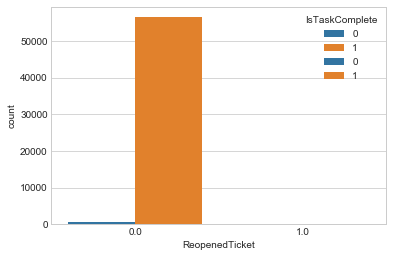

In [45]:

sns.countplot('ReopenedTicket', data=task_df, hue='IsTaskComplete')

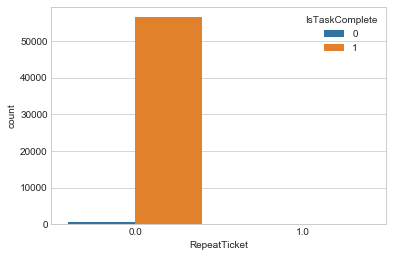

In [50]:
sns.countplot('RepeatTicket', data=task_df, hue='IsTaskComplete')

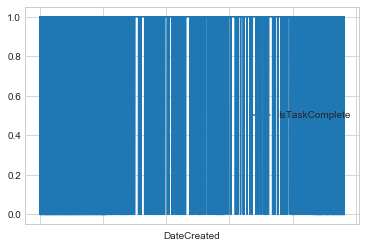

In [57]:
task_df.plot('DateCreated', 'IsTaskComplete')


In [56]:
type(task_df['DateCreated'])

pandas.core.series.Series

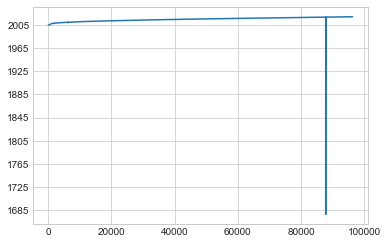

In [58]:
pd.to_datetime(task_df['DateCreated'])

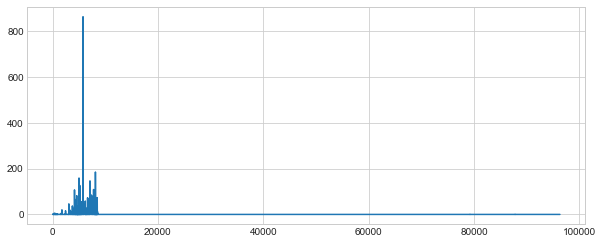

In [63]:
task_df['ActualTimeTaken'].plot(subplots=False,figsize=(10,4))

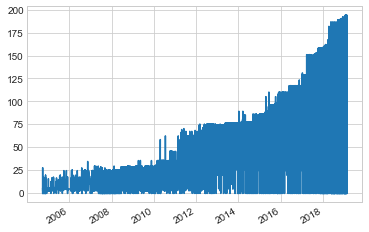

In [82]:

# Tasks assigned year wise to different developers:

import datetime
import random
import matplotlib.pyplot as plt

# make up some data
x = pd.to_datetime(task_df['DateCreated'])
y = task_df['DeveloperKey']

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.figsize=(50,10)
plt.Normalize()
plt.show()

Task Assignment increase yearwise at aconstant rate.

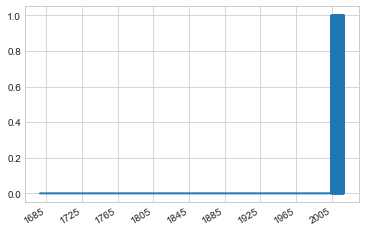

In [108]:



import datetime
import random
import matplotlib.pyplot as plt

# make up some data
x = pd.to_datetime(task_df['DateCreated'])
y =task_df['Category']

# plot
plt.plot(x,y)
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.figsize=(50,10)

plt.show()

As the graph shows, most of the tickets are updated to complete in the year 2010-2019

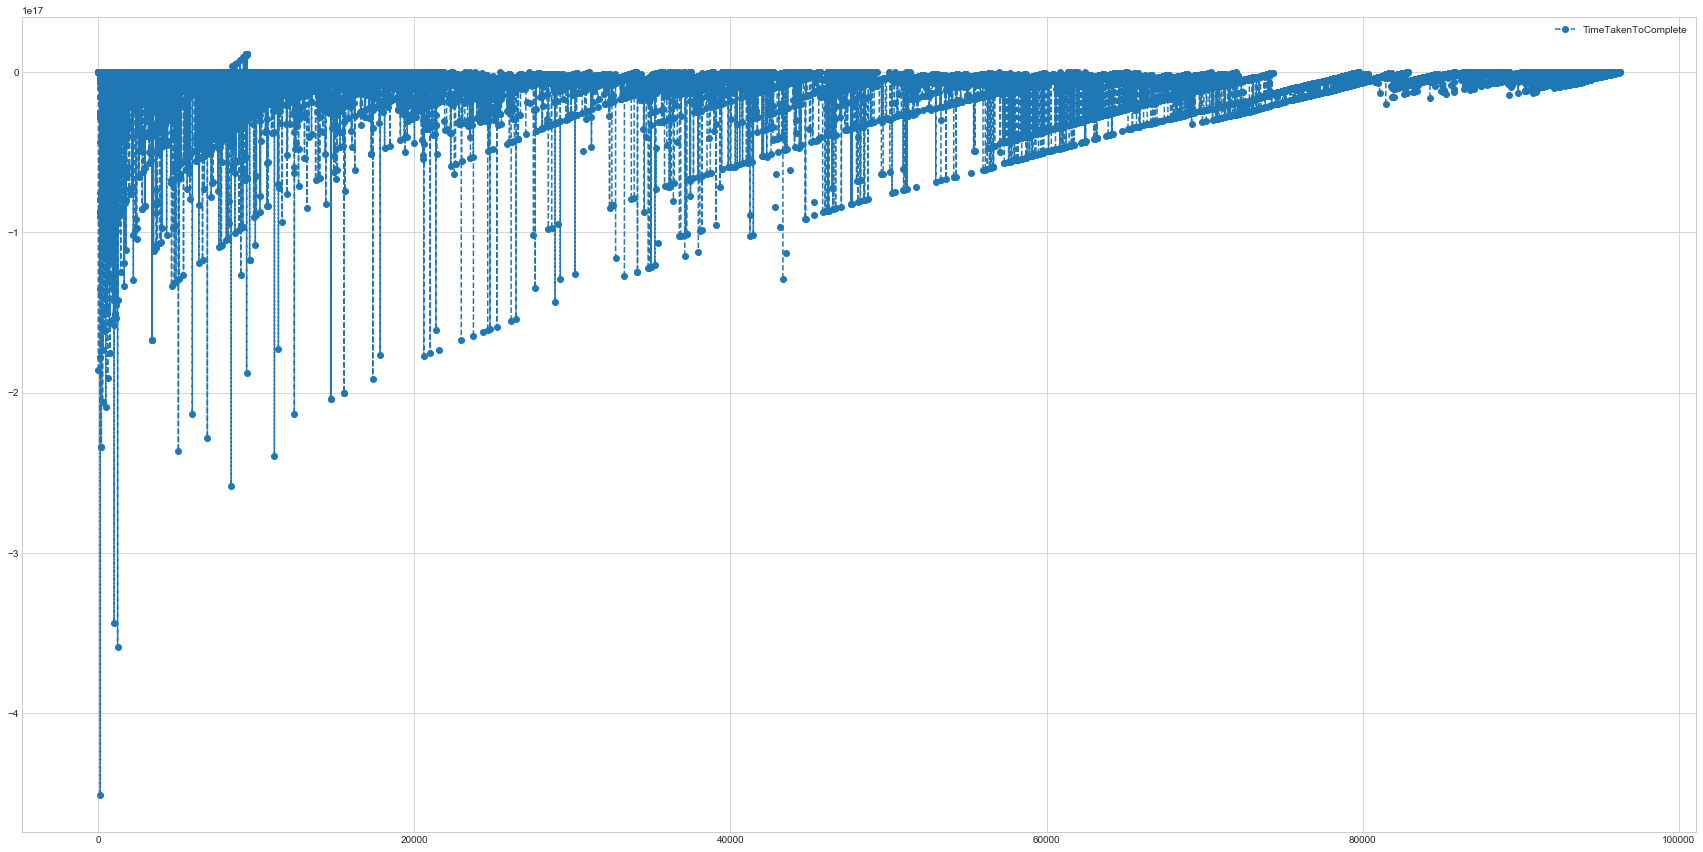

In [94]:
# We'll use pct_change to find the percent change for time taken to complete
task_df['TimeTakenToComplete'] = pd.to_datetime(task_df['DateCreated'])-pd.to_datetime(task_df['ArchiveDate'])
# Then we'll plot the daily change percentage in time for completing every task.  
task_df['TimeTakenToComplete'].plot(figsize=(30,15),legend=True,linestyle='--',marker='o')

In [95]:
t2 =pd.read_csv("Tasks_DF.csv", encoding='latin1',low_memory=False)

In [96]:
task_df['Category']=t2['Category']

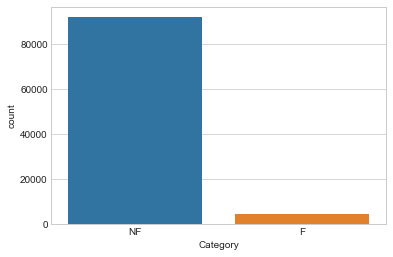

In [4]:
sns.countplot('Category', data=task_df,label=True)

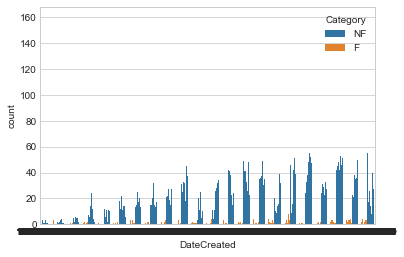

In [8]:
sns.countplot('DateCreated', data=task_df,hue='Category')

# Time Seriese Analysis:

In [33]:
yr = DataFrame(pd.to_datetime(task_df['DateCreated']).dt.year)


In [38]:
yr.columns = ([ 'Year'])


In [110]:
year_wise = yr.groupby('Year')
year_wise_summary=DataFrame(year_wise['Year'].describe())
year_wise_summary


,count,mean,std,min,25%,50%,75%,max
Year,,,,,,,,
2004.0,342.0,2004.0,0.0,2004.0,2004.0,2004.0,2004.0,2004.0
2005.0,210.0,2005.0,0.0,2005.0,2005.0,2005.0,2005.0,2005.0
2006.0,374.0,2006.0,0.0,2006.0,2006.0,2006.0,2006.0,2006.0
2007.0,1061.0,2007.0,0.0,2007.0,2007.0,2007.0,2007.0,2007.0
2008.0,2260.0,2008.0,0.0,2008.0,2008.0,2008.0,2008.0,2008.0
2009.0,3687.0,2009.0,0.0,2009.0,2009.0,2009.0,2009.0,2009.0
2010.0,4154.0,2010.0,0.0,2010.0,2010.0,2010.0,2010.0,2010.0
2011.0,6848.0,2011.0,0.0,2011.0,2011.0,2011.0,2011.0,2011.0
2012.0,7676.0,2012.0,0.0,2012.0,2012.0,2012.0,2012.0,2012.0


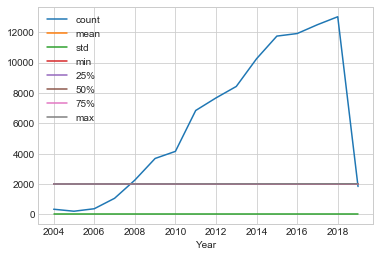

In [69]:
year_wise_summary.plot()


# Regression Analysis:

In [138]:
# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# For evaluating our ML results
from sklearn import metrics

# Dataset Import
import statsmodels.api as sm

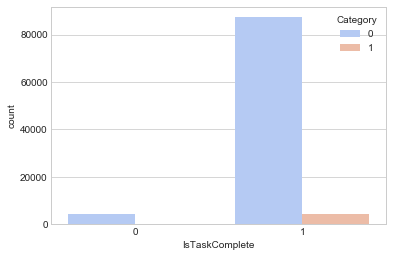

In [112]:
# Factorplot for age with Had Affair hue
sns.countplot('IsTaskComplete',data=task_df,hue='Category',palette='coolwarm')

In [140]:
# Create new DataFrames for the Categorical Variables
df_scaled = pd.read_csv("completion_data_stand.csv", encoding='latin1',low_memory=False)

In [123]:
X = task_df.drop(['Client','UpdatedBy','RequestedBy'],axis=1)

In [120]:
# Concat the dummy DataFrames Together
dummies_1 = pd.concat([client_dummies,requested_dummies],axis=1)

In [141]:
# Now Concat the X DataFrame with the dummy variables
X = df_scaled

# Preview of Result
X.head()

,TaskNumber,DeveloperKey,Client,PriorityIndex,Archive,Schedule,Category2,Category3,Category4,Category5,ClientID,GlobalChangeYsNo,ReopenedTicket,RepeatTicket,IsTaskComplete
0,-3.368657,-1.676673,-1.642372,1.312780,-4.262443,1.140098,0.802244,3.144744,-0.913889,-0.739975,-0.249927,-0.011833,-0.022141,-0.012551,1
1,-3.295645,-1.954084,-0.794101,1.312780,-4.262443,1.140098,0.802244,3.144744,-0.913889,-0.739975,-0.249927,-0.011833,-0.022141,-0.012551,1
2,-3.208380,-1.954084,-1.361741,-0.515291,0.234603,1.140098,1.301131,3.144744,-0.913889,-0.739975,-0.249927,-0.011833,-0.022141,-0.012551,1
3,-3.158196,-2.508907,-0.468824,1.312780,0.234603,1.140098,1.301131,3.144744,-0.913889,-0.739975,-0.249927,-0.011833,-0.022141,-0.012551,1
4,-2.889639,-2.508907,-1.361741,1.312780,-4.262443,1.140098,1.301131,3.144744,-0.913889,-0.739975,1.466600,-0.011833,-0.022141,-0.012551,1


In [142]:
# Set Y as Target class, Had Affair
Y = df_scaled.IsTaskComplete

# Preview
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: IsTaskComplete, dtype: int64

In [143]:
# Ravel to a 1D Array:

# Flatten array
Y = np.ravel(Y)

# Check result
Y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [144]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Make a new log_model
log_model2 =LogisticRegression()

# Now fit the new model
log_model2.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
log_model2.score(X,Y)

1.0

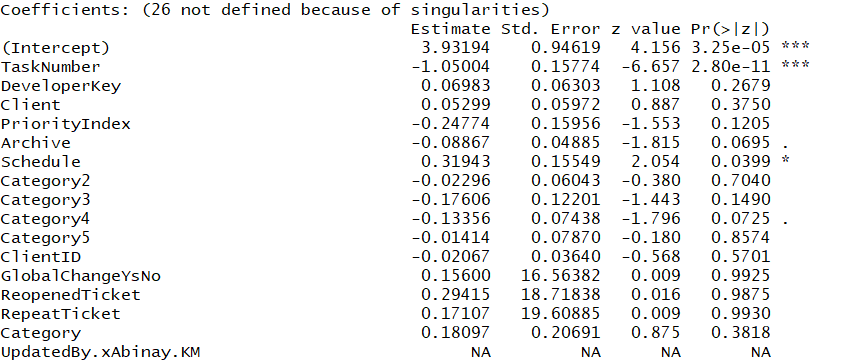

In [150]:
from IPython.display import Image
Image(filename='Regression_Analysis_Summary.png')


# Most coefficients are insignificant due to missing data values

# Inferences:

1. Most of the tickets that take significant time to complete are of Non Financial types. 
2. While updating task details on -1 site the task data should be efficiently filled, as most of the data is mixed and missing.
3. There were significant increase in ticket number from 2014 -2018 and a sudden dip in 2018-2019 (13024 to 1840), this could have been via ETL automation using templates for NonFinancial Requests.
